# Training Neural Net on data program flagged as having trouble with

In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 35 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Wed Oct 04 16:33:46 2017 AEDT

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy
import random
import pandas as pd
import time

import os
import sys

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)
    plt.show()
    plt.show()

## Split Data
- Main directory contains most of the images from the training dataset
- Increase directory includes a subset of the training data that my model had trouble with and I want to supplement

In [3]:
list_image_directory_paths = glob.glob('/home/jack/train/main/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/home/jack/train/main/Queen/', 52)


In [4]:
class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        class_images_dict[image_class_name].append(image)

('Queen', '/home/jack/train/main/Queen/')
('Trident', '/home/jack/train/main/Trident/')
('Hash', '/home/jack/train/main/Hash/')
('5', '/home/jack/train/main/5/')
('CircleHalf', '/home/jack/train/main/CircleHalf/')
('Unknown', '/home/jack/train/main/Unknown/')
('e', '/home/jack/train/main/e/')
('Power', '/home/jack/train/main/Power/')
('Peace', '/home/jack/train/main/Peace/')
('1', '/home/jack/train/main/1/')
('EE', '/home/jack/train/main/EE/')
('Pillars', '/home/jack/train/main/Pillars/')
('ZZ', '/home/jack/train/main/ZZ/')
('Sun', '/home/jack/train/main/Sun/')
('h', '/home/jack/train/main/h/')
('Plane', '/home/jack/train/main/Plane/')
('Asterisk', '/home/jack/train/main/Asterisk/')
('a', '/home/jack/train/main/a/')
('RR', '/home/jack/train/main/RR/')
('ArrowHollow', '/home/jack/train/main/ArrowHollow/')
('6', '/home/jack/train/main/6/')
('Ankh', '/home/jack/train/main/Ankh/')
('r', '/home/jack/train/main/r/')
('AA', '/home/jack/train/main/AA/')
('3', '/home/jack/train/main/3/')
('Circ

In [5]:
len(class_images_dict['AA'])

8205

In [6]:
list_image_directory_paths = glob.glob('/home/jack/train/increase/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/home/jack/train/increase/Queen/', 51)


In [7]:
increase_class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    increase_class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        increase_class_images_dict[image_class_name].append(image)

('Queen', '/home/jack/train/increase/Queen/')
('Trident', '/home/jack/train/increase/Trident/')
('Hash', '/home/jack/train/increase/Hash/')
('5', '/home/jack/train/increase/5/')
('CircleHalf', '/home/jack/train/increase/CircleHalf/')
('e', '/home/jack/train/increase/e/')
('Power', '/home/jack/train/increase/Power/')
('Peace', '/home/jack/train/increase/Peace/')
('1', '/home/jack/train/increase/1/')
('EE', '/home/jack/train/increase/EE/')
('Pillars', '/home/jack/train/increase/Pillars/')
('ZZ', '/home/jack/train/increase/ZZ/')
('Sun', '/home/jack/train/increase/Sun/')
('h', '/home/jack/train/increase/h/')
('Plane', '/home/jack/train/increase/Plane/')
('Asterisk', '/home/jack/train/increase/Asterisk/')
('a', '/home/jack/train/increase/a/')
('RR', '/home/jack/train/increase/RR/')
('ArrowHollow', '/home/jack/train/increase/ArrowHollow/')
('6', '/home/jack/train/increase/6/')
('Ankh', '/home/jack/train/increase/Ankh/')
('r', '/home/jack/train/increase/r/')
('AA', '/home/jack/train/increase/

e


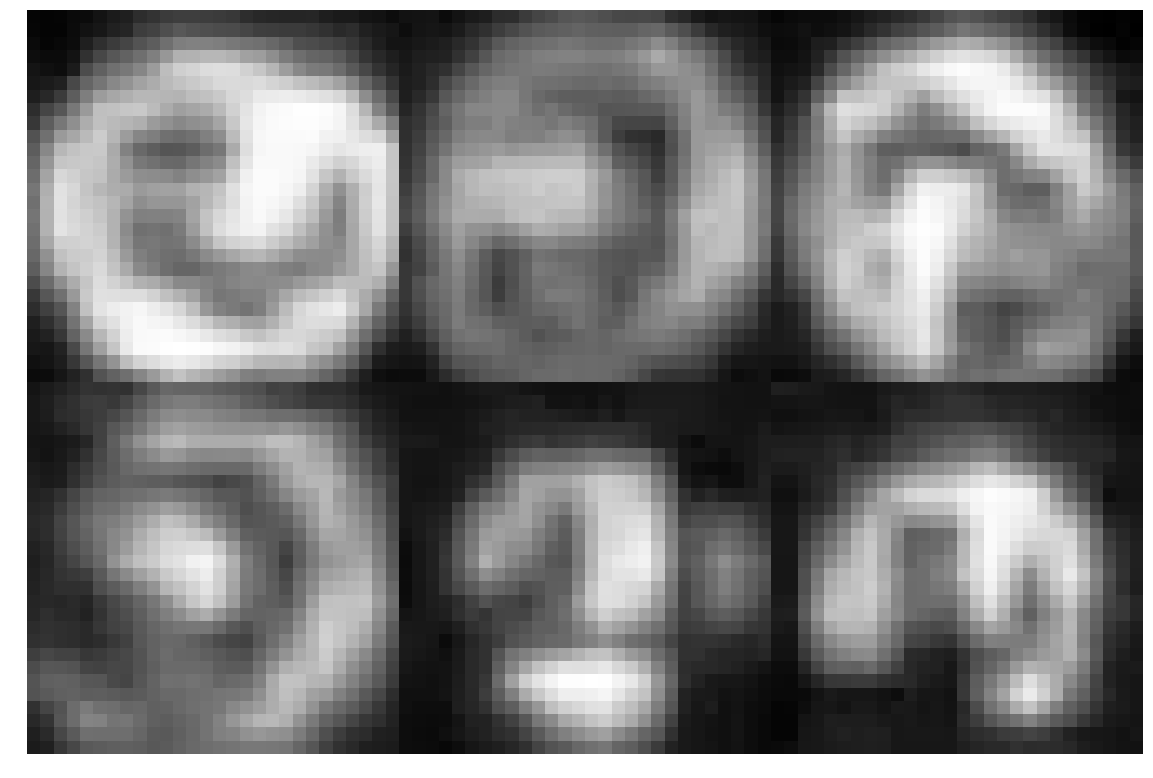

Power


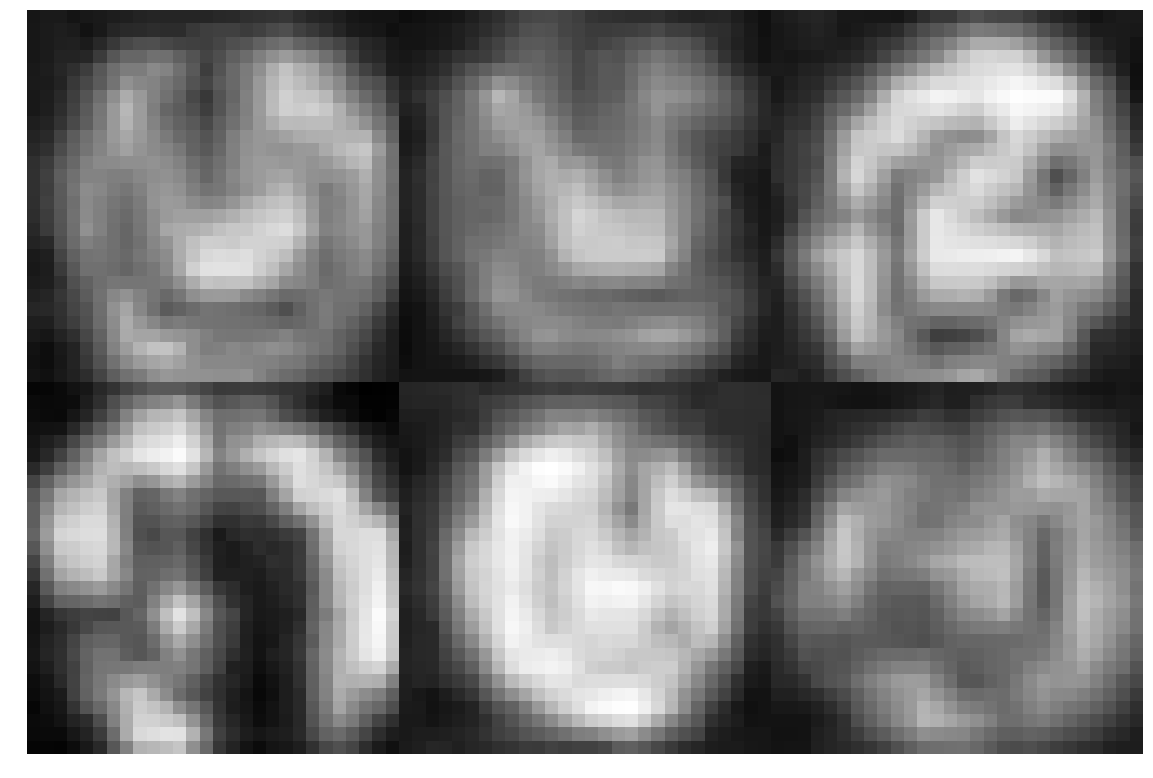

KK


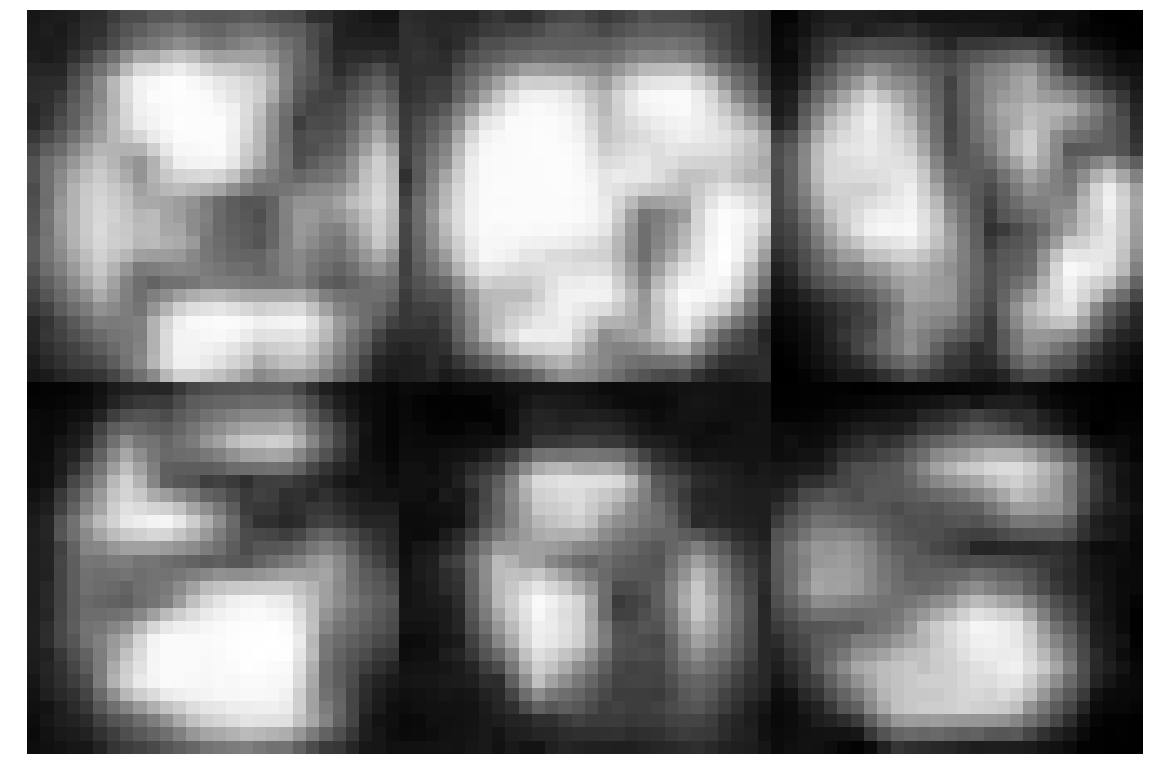

h


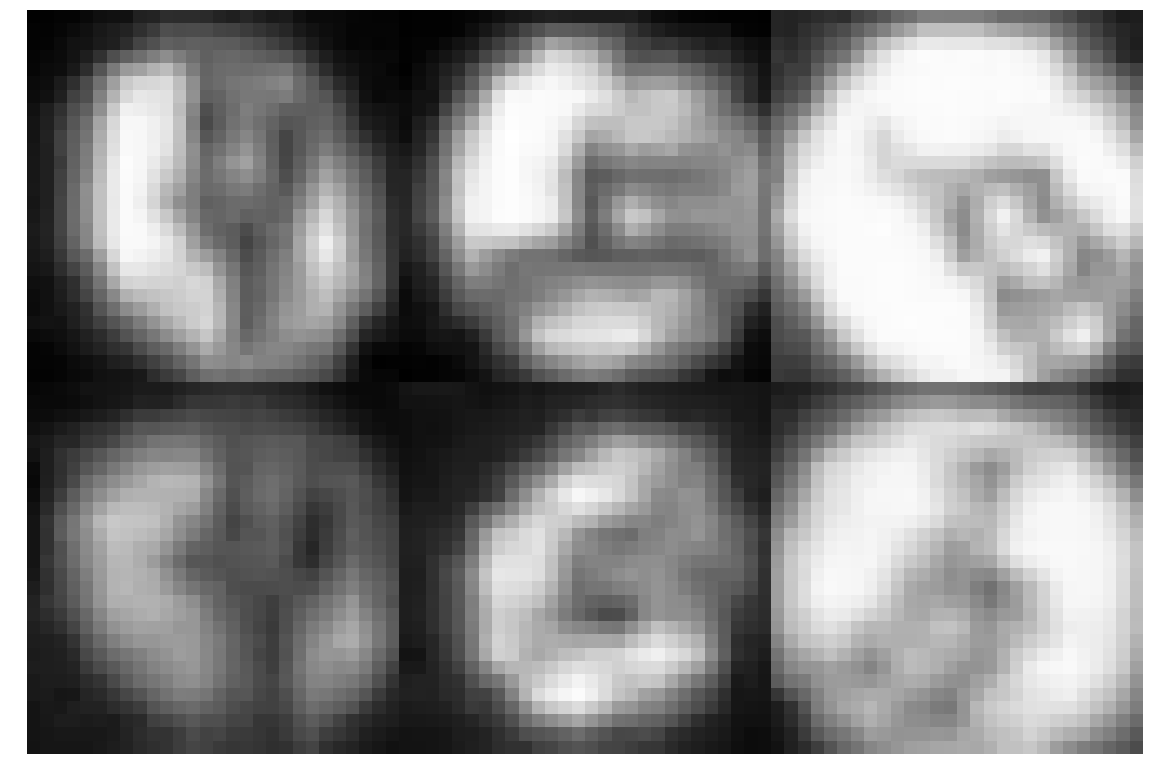

Queen


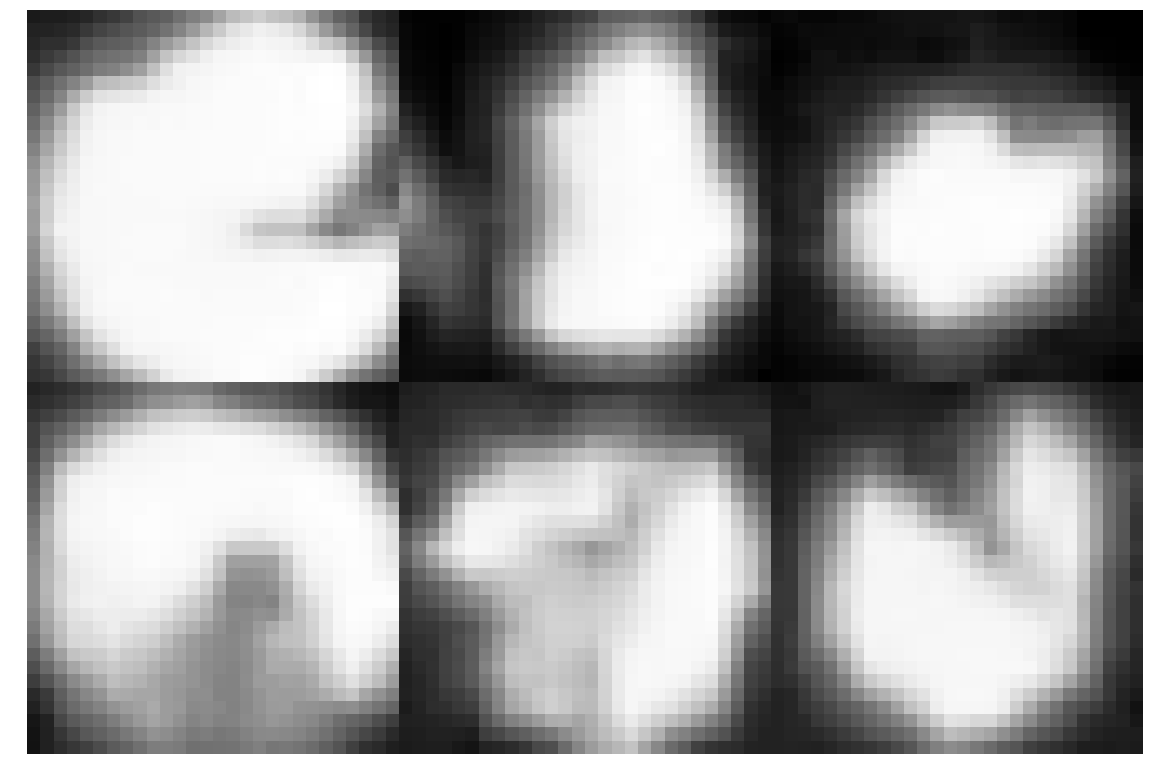

Tadpole


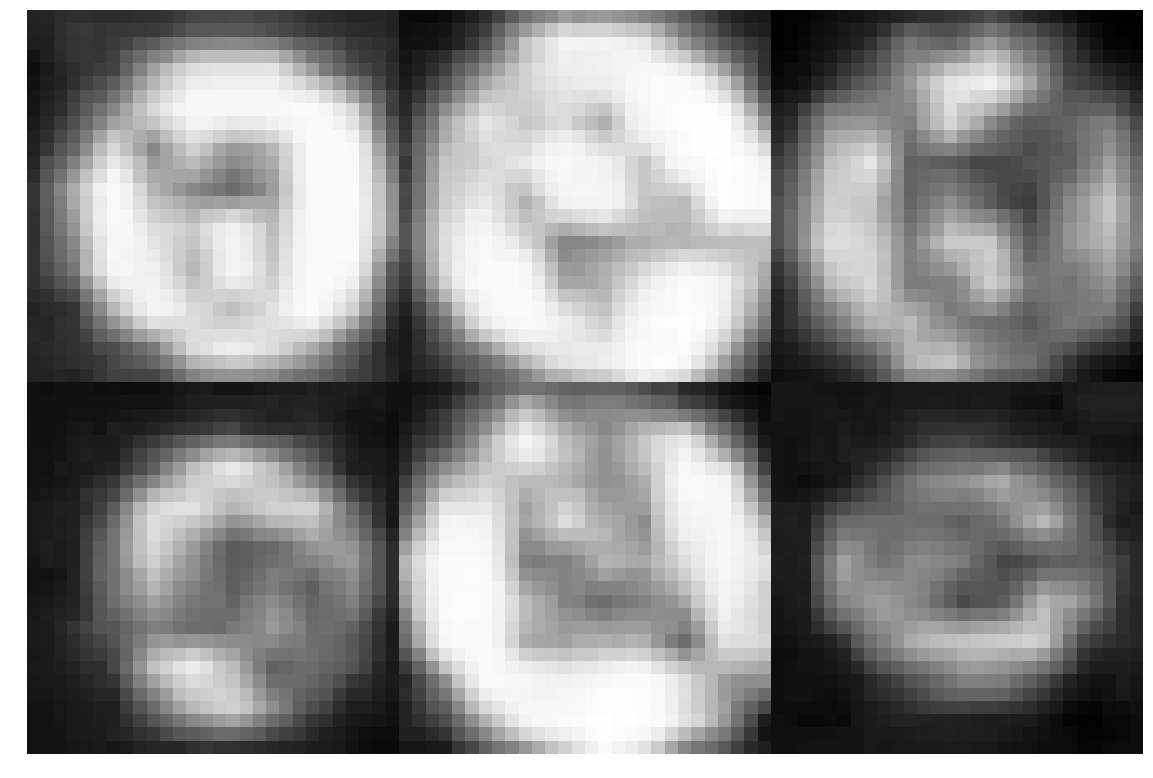

MM


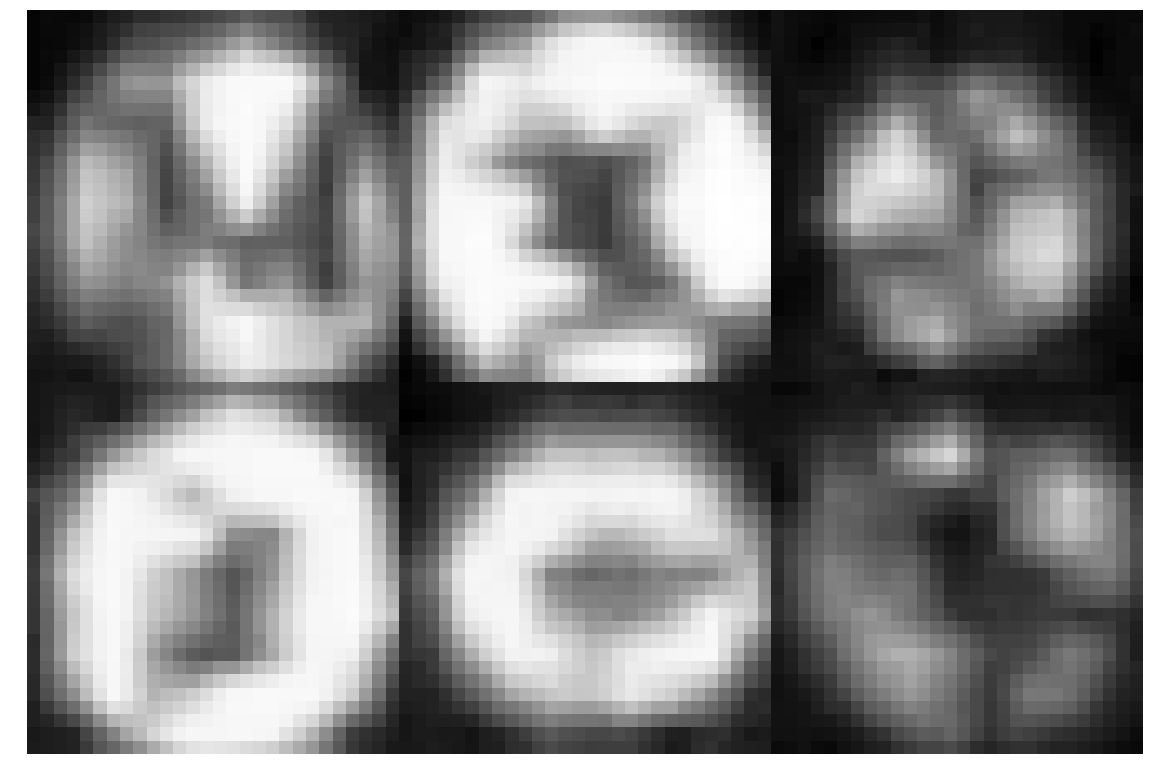

2


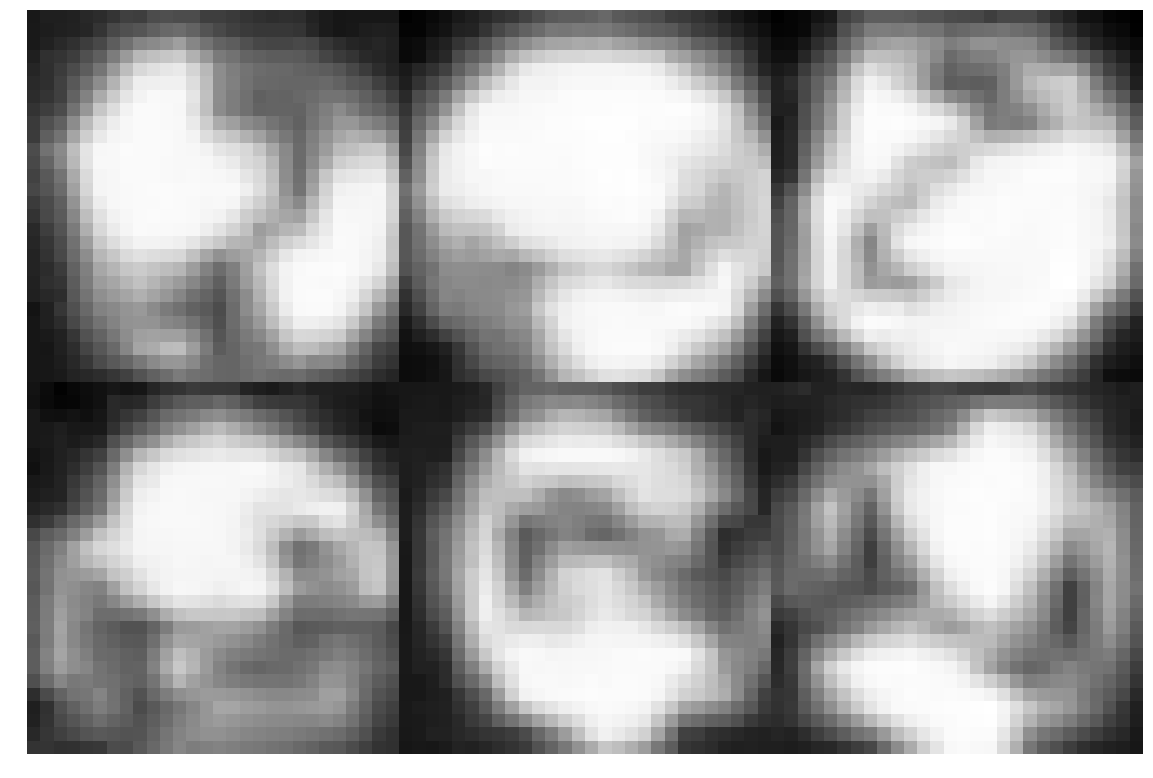

r


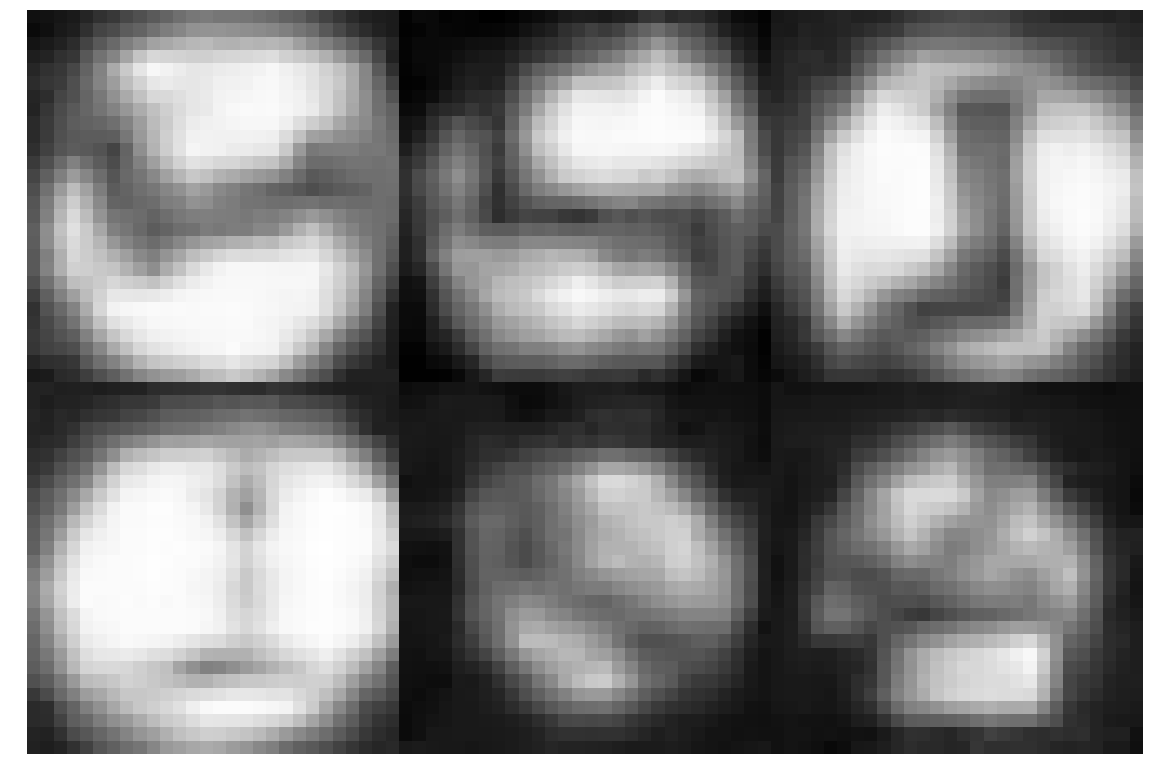

ArrowLine


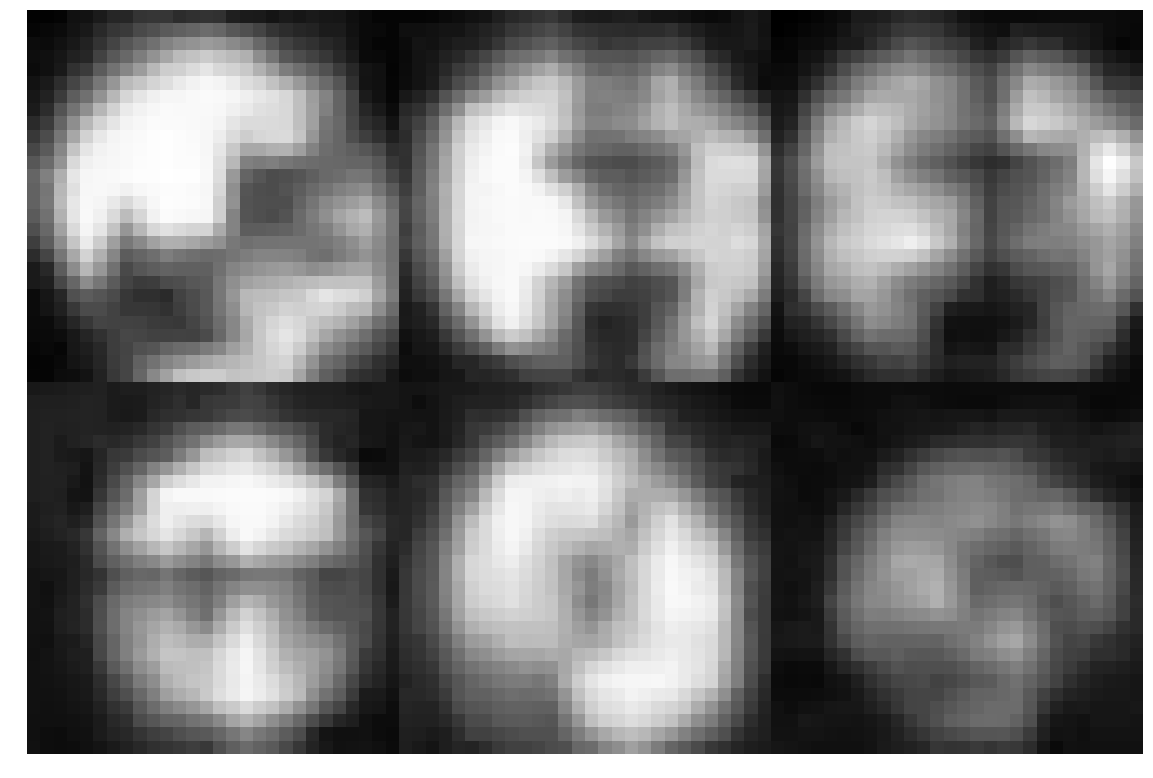

y


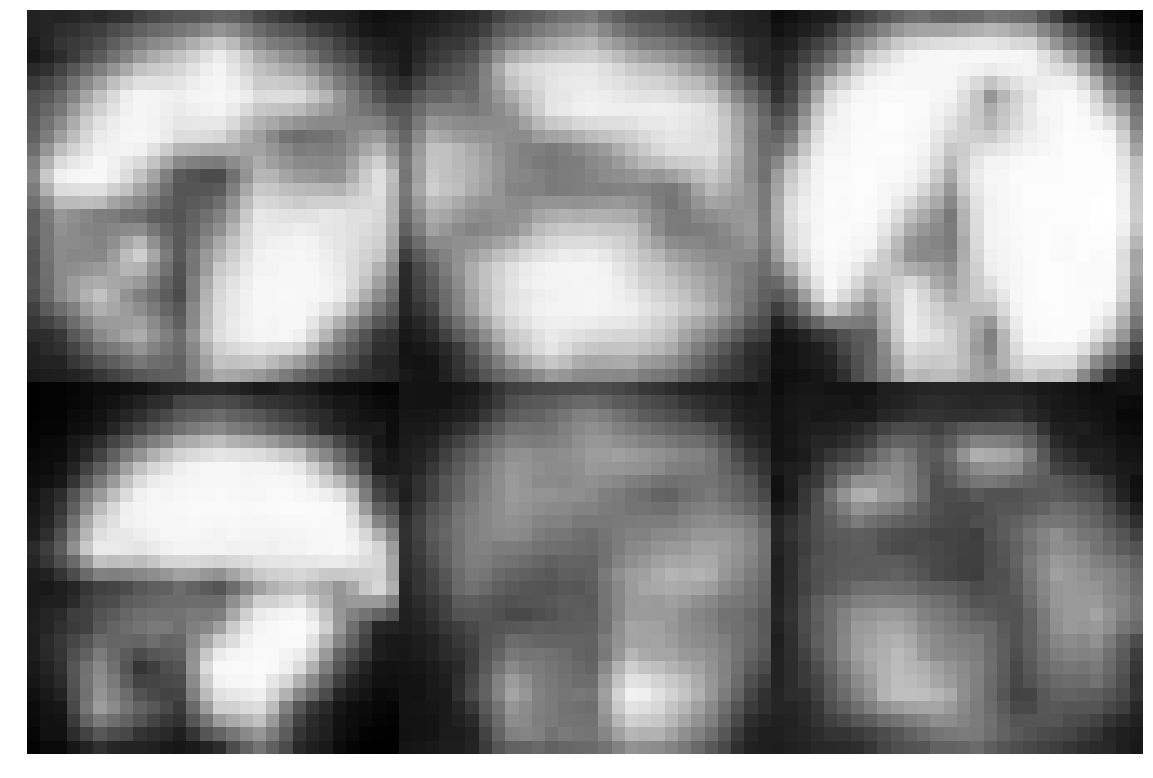

CircleCross


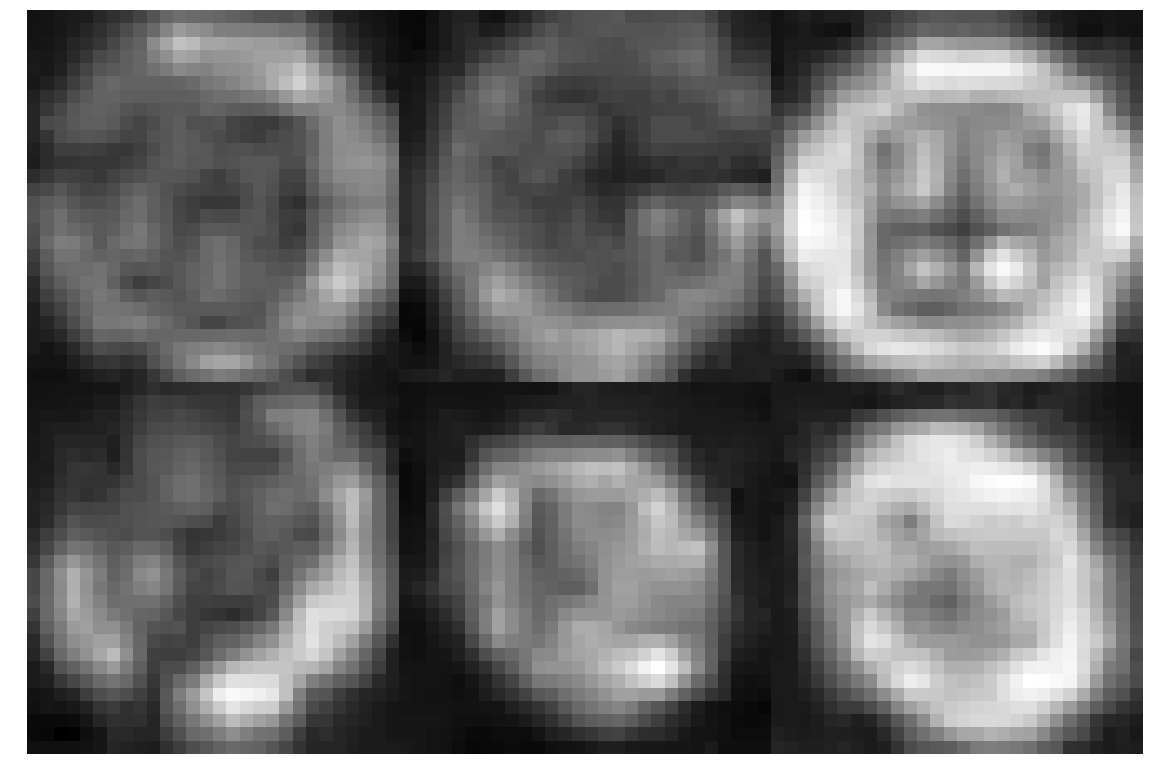

In [8]:
cl = class_images_dict.keys()
for c in cl[40:]:
    print(c)
    if c in increase_class_images_dict.keys():
        i1 = np.hstack((class_images_dict[c][0], class_images_dict[c][1], class_images_dict[c][2]))
        i2 = np.hstack((increase_class_images_dict[c][0], increase_class_images_dict[c][1], increase_class_images_dict[c][2]))
        i3 = np.vstack((i1, i2))
        view(i3)
    else:
        print('U')
        

In [9]:
num_images_by_class = {'class': [], 'num_main': [], 'num_increase': []}

for k in class_images_dict.keys():
    num_images_by_class['class'].append(k)
    num_images_by_class['num_main'].append(len(class_images_dict[k]))
    if k in increase_class_images_dict.keys():
        num_images_by_class['num_increase'].append(len(increase_class_images_dict[k]))
    else:
        num_images_by_class['num_increase'].append(0)
    
pd.DataFrame(num_images_by_class)

,class,num_increase,num_main
0,CircleLine,2303,20480
1,Sun,1992,8846
2,Unknown,0,55109
3,Peace,1441,19202
4,Pillars,1529,46960
5,HH,659,10084
6,Ampersand,3555,54727
7,PP,2995,29468
8,Hash,2564,10201
9,RR,761,13421


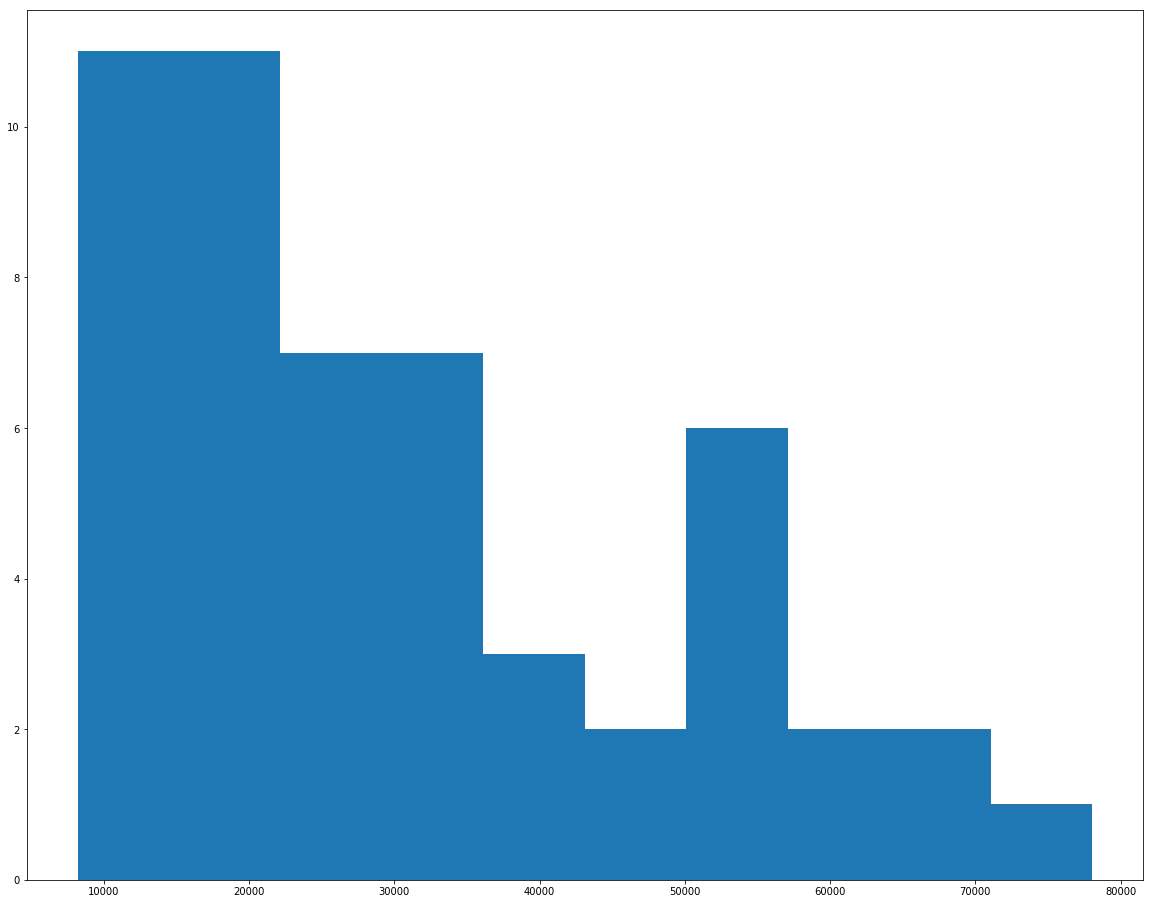

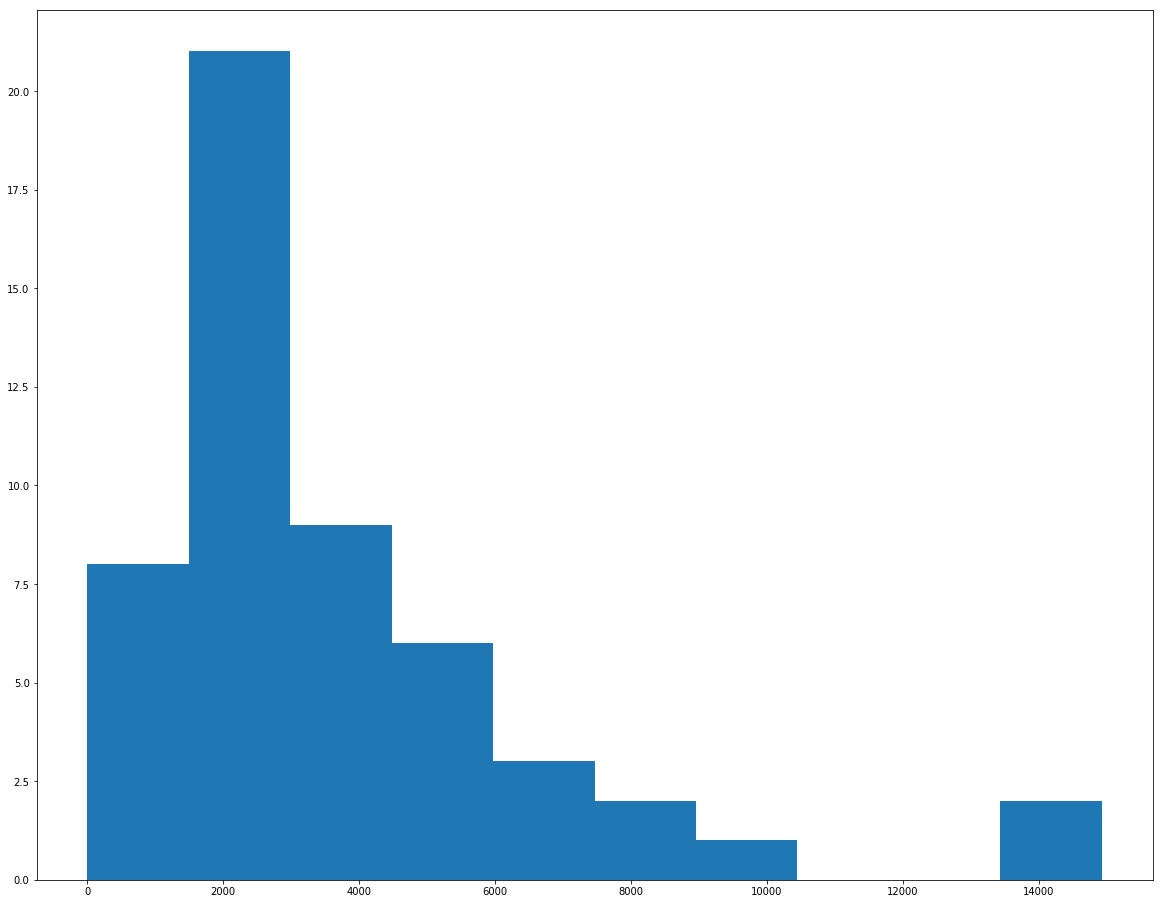

In [10]:
plt.figure()
plt.hist(num_images_by_class['num_main'])
plt.show()

plt.figure()
plt.hist(num_images_by_class['num_increase'])
plt.show()

## Upsampling Classes
I've decided to increase the number and variation of different classes depending on how many training samples I have. I'm aiming for each group to end up with ~90-120k images per class.
- 50k+   x 2
- 40-50k x 3
- 30-40k x 4
- 20-30k x 6
- 15-20k x 8
- 10-15k x 10
- <10k   x 13

In [11]:
def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 20, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image

def rotate_image(image, degrees):
    rotated_images = []
    for angle in range(degrees, 360, degrees):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def change_brightness(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 50)
    decrease_brightness = norm_image(image_int32 - 50)
    return [increase_brightness, decrease_brightness]

def change_contrast(image):
    image_int32 = np.int32(image)
    increase_contrast = norm_image(image_int32 * 1.3)
    decrease_contrast = norm_image(image_int32 * 0.3)
    return [increase_contrast, decrease_contrast]
    
def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[2:26, 2:26] = image[2:26, 2:26]
    return full_size

def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

In [12]:
def gen_2_images(image):
    new_images = [image]
    r = rotate_image(image, 90)[0]
    new_images.append(occlude_edges(r))
    
    return new_images

def gen_3_images(image):
    new_images = [image]
    r1, r2 = rotate_image(image, 90)[:2]
    r1 = change_brightness(r1)[0]
    r1 = occlude_edges(r1)
    r2 = change_brightness(r2)[1]
    new_images.extend([r1, r2])
    
    return new_images

def gen_4_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images[1] = change_brightness(new_images[1])[0]
    new_images[2] = change_brightness(new_images[2])[1]
    new_images[3] = occlude_edges(new_images[3])
    
    return new_images
    
def gen_6_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images[1] = occlude_edges(new_images[1])
    new_images.extend(change_brightness(image))
    
    return new_images
    
def gen_8_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images[1] = occlude_edges(new_images[1])
    new_images.extend(change_brightness(image))
    new_images.extend(change_contrast(image))
    
    return new_images
    
def gen_10_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images[1] = occlude_edges(new_images[1])
    new_images.extend(change_brightness(image))
    new_images.extend(change_contrast(image))
    new_images.extend(change_brightness(new_images[3]))
    
    return new_images
    

def gen_13_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images.append(occlude_edges(image))
    new_images.extend(change_brightness(image))
    new_images.extend(change_contrast(image))
    new_images.extend(change_brightness(new_images[3]))
    new_images.extend(change_contrast(new_images[3]))
    
    return new_images

2


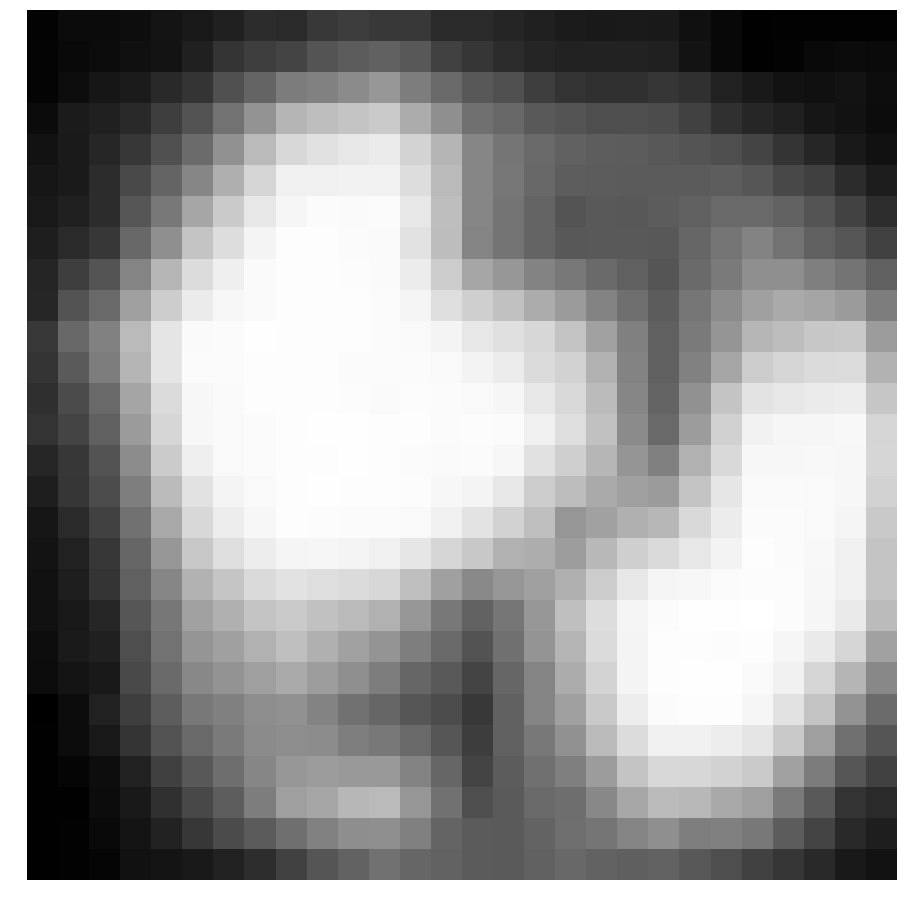

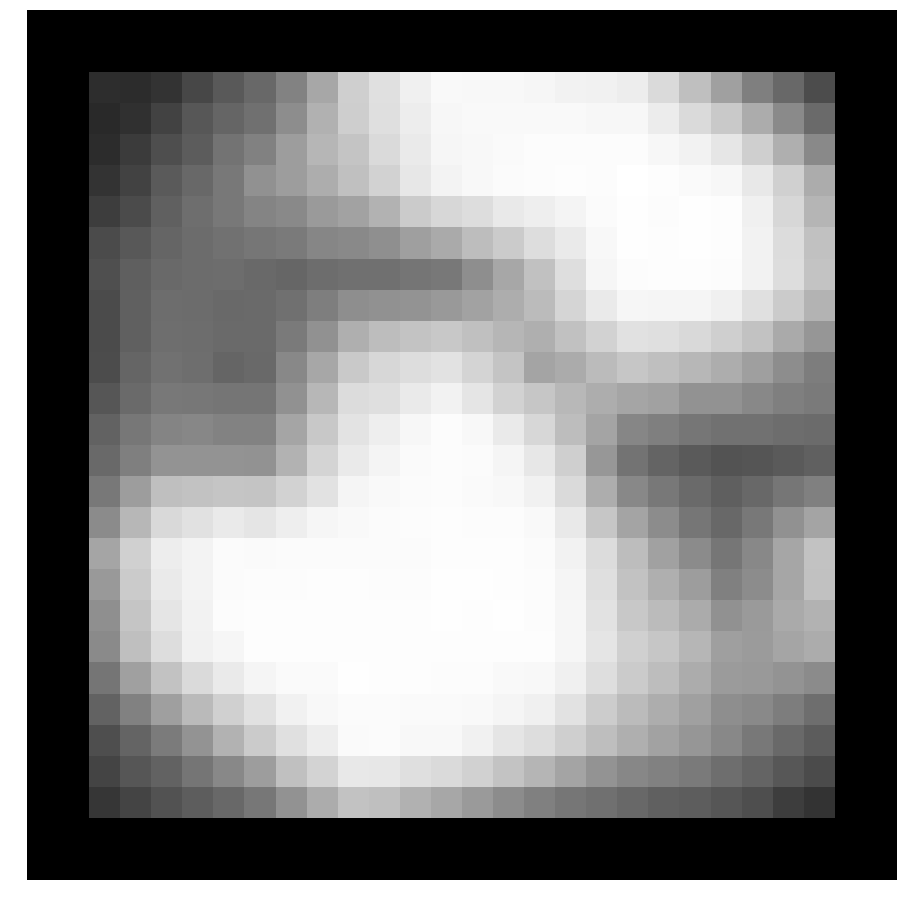

In [13]:
test_image = class_images_dict['2'][0]

gen_fun = gen_2_images
print(len(gen_fun(test_image)))
for im in gen_fun(test_image):
    view(im)

In [14]:
def augment_image_class(image_list_to_increase):
    num_images = len(image_list_to_increase)
    increase_images_func = None
    augmented_image_list = []
    
    if num_images > 50000:
        increase_images_func = gen_2_images
    elif num_images > 40000:
        increase_images_func = gen_3_images
    elif num_images > 30000:
        increase_images_func = gen_4_images
    elif num_images > 20000:
        increase_images_func = gen_6_images
    elif num_images > 15000:
        increase_images_func = gen_8_images
    elif num_images > 10000:
        increase_images_func = gen_10_images
    else:
        #images < 10k
        increase_images_func = gen_13_images
        
    for image in image_list_to_increase:
        augmented_image_list.extend(increase_images_func(image))
        
    return augmented_image_list

def augment_images_to_increase(image_list_to_increase):
    num_images = len(image_list_to_increase)
    increase_images_func = None
    augmented_image_list = []
    
    increase_images_func = gen_13_images
    
    #if num_images > 10000:
        #increase_images_func = gen_6_images
    #else:
        #increase_images_func = gen_13_images
    
    for image in image_list_to_increase:
        augmented_image_list.extend(increase_images_func(image))
    return augmented_image_list

In [15]:
X = []
image_class_names_index = 0
image_class_names = {}
y = []

for tag_class in class_images_dict.keys():
    image_class_names[image_class_names_index] = tag_class
    generated_images = augment_image_class(class_images_dict[tag_class])
    if tag_class in increase_class_images_dict.keys():
        generated_images.extend(augment_images_to_increase(increase_class_images_dict[tag_class]))
    labels = [image_class_names_index] * len(generated_images)
    
    X.extend(generated_images)
    y.extend(labels)
    
    print(tag_class, image_class_names_index, set(labels), len(generated_images), len(labels))
    
    image_class_names_index += 1
    
X = np.array(X)
y = np.array(y)

('CircleLine', 0, set([0]), 152819, 152819)
('Sun', 1, set([1]), 140894, 140894)
('Unknown', 2, set([2]), 110218, 110218)
('Peace', 3, set([3]), 172349, 172349)
('Pillars', 4, set([4]), 160757, 160757)
('HH', 5, set([5]), 109407, 109407)
('Ampersand', 6, set([6]), 155669, 155669)
('PP', 7, set([7]), 215743, 215743)
('Hash', 8, set([8]), 135342, 135342)
('RR', 9, set([9]), 144103, 144103)
('Ankh', 10, set([10]), 203109, 203109)
('Trident', 11, set([11]), 219004, 219004)
('Asterisk', 12, set([12]), 164873, 164873)
('4', 13, set([13]), 238101, 238101)
('Lines3', 14, set([14]), 143867, 143867)
('1', 15, set([15]), 276838, 276838)
('0', 16, set([16]), 206593, 206593)
('3', 17, set([17]), 186313, 186313)
('Plane', 18, set([18]), 149330, 149330)
('5', 19, set([19]), 200739, 200739)
('CircleHalf', 20, set([20]), 151901, 151901)
('7', 21, set([21]), 252797, 252797)
('6', 22, set([22]), 173672, 173672)
('8', 23, set([23]), 294188, 294188)
('Omega', 24, set([24]), 167255, 167255)
('ArrowHollow', 

In [16]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((9397555, 28, 28), (9397555,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
Sun


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((9397555, 28, 28), (9397555,), (0, 28, 28), (0,))


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [19]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [20]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape

(9397555, 28, 28, 1)

In [21]:
del class_images_dict
del increase_class_images_dict
del X
del y

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [23]:
X_train /= 255
X_test /= 255

In [24]:
model = Sequential()
# input layer
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28))) # if theano backend
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(52, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(X_train, Y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
9397555/9397555 [==============================] - 995s - loss: 1.3945 - acc: 0.5974   
Epoch 2/10
9397555/9397555 [==============================] - 877s - loss: 1.1521 - acc: 0.6687   
Epoch 3/10
9397555/9397555 [==============================] - 802s - loss: 1.0951 - acc: 0.6851   
Epoch 4/10
9397555/9397555 [==============================] - 770s - loss: 1.0645 - acc: 0.6942   
Epoch 5/10
9397555/9397555 [==============================] - 761s - loss: 1.0477 - acc: 0.6989   
Epoch 6/10
9397555/9397555 [==============================] - 802s - loss: 1.0315 - acc: 0.7034   
Epoch 7/10
9397555/9397555 [==============================] - 785s - loss: 1.0155 - acc: 0.7082   
Epoch 8/10
9397555/9397555 [==============================] - 785s - loss: 1.0003 - acc: 0.7127   
Epoch 9/10
9397555/9397555 [==============================] - 819s - loss: 0.9944 - acc: 0.7143   
Epoch 10/10
9397555/9397555 [==============================] - 782s - loss: 0.9919 - acc: 0.7152   


In [26]:
model.save('model.h5')

In [27]:
print(image_class_names)

{0: 'CircleLine', 1: 'Sun', 2: 'Unknown', 3: 'Peace', 4: 'Pillars', 5: 'HH', 6: 'Ampersand', 7: 'PP', 8: 'Hash', 9: 'RR', 10: 'Ankh', 11: 'Trident', 12: 'Asterisk', 13: '4', 14: 'Lines3', 15: '1', 16: '0', 17: '3', 18: 'Plane', 19: '5', 20: 'CircleHalf', 21: '7', 22: '6', 23: '8', 24: 'Omega', 25: 'ArrowHollow', 26: 'AA', 27: 'Radioactive', 28: 'Heart', 29: 'EE', 30: 'UU', 31: 'Plant', 32: 'GG', 33: 'XX', 34: 'ZZ', 35: 'Necklace', 36: 'Triangle', 37: 'Dot', 38: 'a', 39: 'Note', 40: 'e', 41: 'Power', 42: 'KK', 43: 'h', 44: 'Queen', 45: 'Tadpole', 46: 'MM', 47: '2', 48: 'r', 49: 'ArrowLine', 50: 'y', 51: 'CircleCross'}


In [28]:
score = model.evaluate(X_train, Y_train) #, verbose=0
score

9397216/9397555 [============================>.] - ETA: 0s

[0.5084411929305328, 0.86694879678811343]

In [29]:
pc = model.predict_classes(X_train)
pc

9397555/9397555 [==============================] - 628s   


array([49,  3,  0, ..., 10, 51,  3])

In [30]:
from sklearn.metrics import confusion_matrix

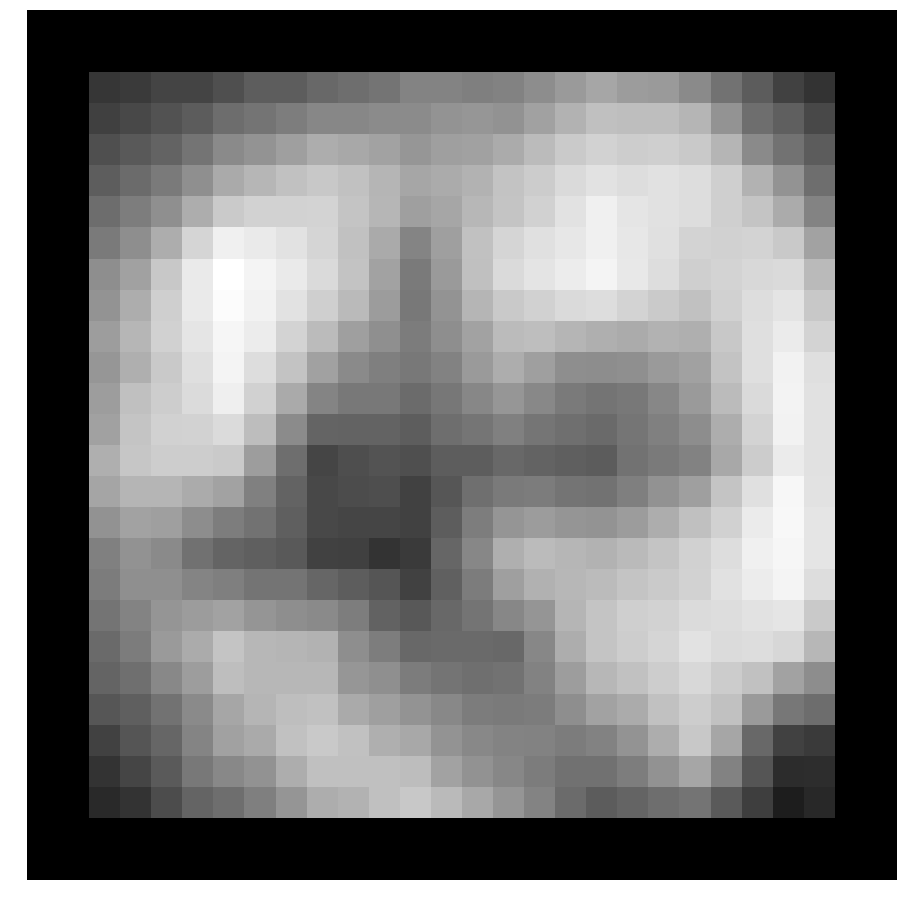

'Trident'

In [31]:
view(X_train[101].reshape(1, 28, 28)[0])
image_class_names[pc[101]]

#X_train[9].reshape(1, 28, 28)[0].shape

In [32]:
cm = confusion_matrix(y_train, pc, labels=None, sample_weight=None)

In [33]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

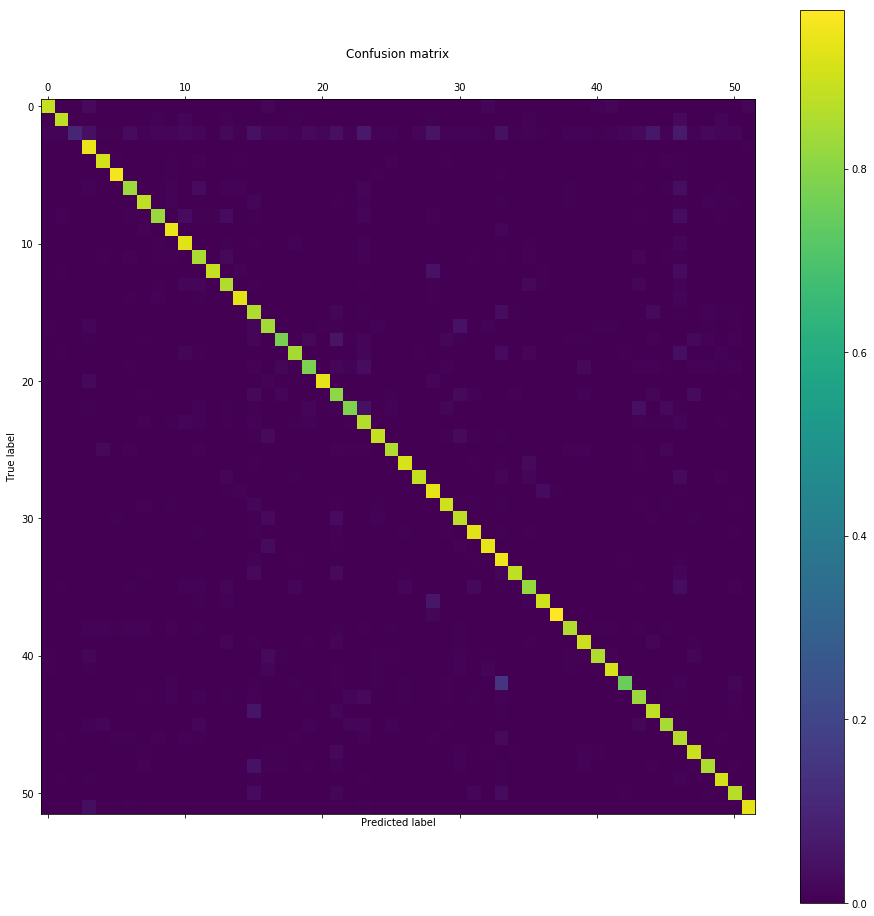

In [34]:
plt.figure()
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()